Analytic calculation of the delensed BB and lensing template BB for SO and idealistic cases

In [1]:
import numpy as np, basic, prjlib
from matplotlib.pyplot import *

In [2]:
p, f, r = prjlib.analysis_init()
dlmin = 20
dlmax = 3000
fpolnoise = '../../data/forecast/so/noise/SO_LAT_Nell_P_goal_fsky0p4.txt'

In [3]:
# E diagonal filter
Np = np.loadtxt(fpolnoise,unpack=True,usecols=(1,2,3,4,5,6))/2.72e6**2
Nl = 1./np.sum(1./Np,axis=0)
obs = np.loadtxt(f.cmb.scl,unpack=True,usecols=(1,2,3,4))
sig = np.loadtxt(f.cmb.scl,unpack=True,usecols=(5,6,7,8))
WE = r.ucl[1,:dlmax+1]/(r.ucl[1,:dlmax+1]+Nl[:dlmax+1])
we = np.ones(dlmax+1)
WE[:100]  = 0.
we[:100]  = 0.

In [4]:
# phi diagonal wiener filter
W0 = np.ones(dlmax+1)
W1 = np.ones(dlmax+1)
W0[3001:] = 0.
W1[3001:] = 0.

In [5]:
# compute residual BB and template B-mode spectra
bb0 = basic.delens.resbb(p.lmax,dlmin,dlmax,r.ucl[1,:dlmax+1],r.ucl[3,:dlmax+1],WE,W0)
bb1 = basic.delens.resbb(p.lmax,dlmin,dlmax,r.ucl[1,:dlmax+1],r.ucl[3,:dlmax+1],we,W1)
LT0 = basic.delens.lintemplate(p.lmax,dlmin,dlmax,r.ucl[1,:dlmax+1],r.ucl[3,:dlmax+1],WE,W0)
LT1 = basic.delens.lintemplate(p.lmax,dlmin,dlmax,r.ucl[1,:dlmax+1],r.ucl[3,:dlmax+1],we,W1)

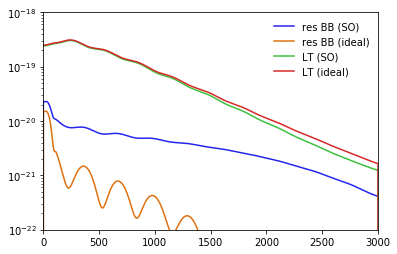

In [6]:
# plot
xlim(2,3000)
ylim(1e-22,1e-18)
yscale('log')
plot(r.eL,bb0,label='res BB (SO)')
plot(r.eL,bb1,label='res BB (ideal)')
plot(r.eL,LT0,label='LT (SO)')
plot(r.eL,LT1,label='LT (ideal)')
legend()